In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cosine
from sklearn.metrics.pairwise import cosine_similarity
import warnings

sns.set_palette("Set2")
# sns.set_style("ticks")

warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

sns.set_style("whitegrid")
sns.set_context("talk")

In [38]:
div = pd.read_csv("diversity_all_plans.csv")
div.sample(2)

,up_id,up_title,n_courses,n_clusters,modularity,diversity,inside_distance,rf,Год,Квалификация
399,7209,Перспективные системы передачи данных / Advanc...,76,12,0.617,0.831193,0.666981,Реальные данные,2022,Магистратура
14,6876,Компьютерные технологии в дизайне,27,5,0.341,0.702391,0.379550,Реальные данные,2018,Бакалавриат


In [39]:
con = pd.read_csv("connectivity_all_plans.csv")
con.sample(2)

,up_id,embed,num_of_disciplines,entropy,Год,Квалификация
281,7332,[2.25 0. 0.16666667 0.05263158 0...,18,0.450239,2020,Магистратура
108,7088,[3.02579365 3. 0. 1.21590909 1...,69,0.266783,2020,Бакалавриат


In [40]:
vectors = pd.read_csv("plans_with_init_vect.csv")
vectors.sample(2)

,Unnamed: 0,up_id,up_title,n_courses,n_clusters,modularity,diversity,inside_distance,Данные,vector
31,31,6893,Цифровые технологии в приборостроении,65,10,0.595,0.761992,0.504375,Реальные,[ 57. 33. 0. 23. 2. 1. 31. 13. 1. ...
244,244,7126,Системное и прикладное программное обеспечение,113,9,0.585,0.758723,0.505053,Реальные,[ 73. 50. 0. 53. 12. 10. 27. 43. 8. ...


In [41]:
tot = pd.merge(div, con, left_on=["up_id", "Год", "Квалификация"], right_on=["up_id", "Год", "Квалификация"])
tot.shape, div.shape, con.shape

((449, 13), (449, 10), (458, 6))

In [42]:
tot = pd.merge(tot, vectors[["up_id", "vector"]], left_on="up_id", right_on="up_id", how="left")
tot.sample()

,up_id,up_title,n_courses,n_clusters,modularity,diversity,inside_distance,rf,Год,Квалификация,embed,num_of_disciplines,entropy,vector
199,6996,Программное обеспечение интеллектуальных систе...,25,6,0.501,0.666091,0.655158,Реальные данные,2020,Магистратура,[6.03571429 0. 0. 1.05263158 0...,24,0.403754,[48. 0. 0. 4. 1. 1. 28. 1. 1. 1. 14. ...


In [43]:
tot.drop_duplicates(subset=["up_title", "Год", "Квалификация"], inplace=True)

In [44]:
tot.dropna(subset=["vector"], inplace=True)

In [45]:
tot["vector"] = tot["vector"].apply(lambda x: np.array([float(y) for y in x.strip("[]").split()]))

In [46]:
tot["embed"] = tot["embed"].apply(lambda x: np.array([float(y) for y in x.strip("[]").split()]))
tot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 346 entries, 0 to 444
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   up_id               346 non-null    int64  
 1   up_title            346 non-null    object 
 2   n_courses           346 non-null    int64  
 3   n_clusters          346 non-null    int64  
 4   modularity          346 non-null    float64
 5   diversity           346 non-null    float64
 6   inside_distance     330 non-null    float64
 7   rf                  346 non-null    object 
 8   Год                 346 non-null    int64  
 9   Квалификация        346 non-null    object 
 10  embed               346 non-null    object 
 11  num_of_disciplines  346 non-null    int64  
 12  entropy             346 non-null    float64
 13  vector              346 non-null    object 
dtypes: float64(4), int64(5), object(5)
memory usage: 40.5+ KB


In [47]:
nov_dict = {}

for i in tot.index.values:
    for j in tot.index.values:
        if tot["Квалификация"][i] == tot["Квалификация"][j] and tot["up_title"][i] == tot["up_title"][j]:
            if tot["Год"][i]-tot["Год"][j] == 1:
                nov_dict[tot["up_id"][i]] = cosine(tot["embed"][i], tot["embed"][j])

In [48]:
tot = pd.merge(tot, pd.DataFrame(nov_dict.items(), columns=["up_id", "novelty"]), left_on="up_id", right_on="up_id", how="left").fillna(1)
tot

,up_id,up_title,n_courses,n_clusters,modularity,diversity,inside_distance,rf,Год,Квалификация,embed,num_of_disciplines,entropy,vector,novelty
0,6859,Нанофотоника и квантовая оптика,47,9,0.603,0.613275,0.533947,Реальные данные,2018,Бакалавриат,"[2.80555556, 1.31111111, 1.25, 2.81904762, 1.8...",47,0.317040,"[57.0, 33.0, 8.0, 46.0, 14.0, 11.0, 8.0, 12.0,...",1.0
1,6860,Информационные технологии в энергетике,47,7,0.578,0.673858,0.516951,Реальные данные,2018,Бакалавриат,"[2.225, 1.86785714, 0.96071429, 1.85119048, 2....",47,0.366740,"[58.0, 37.0, 6.0, 38.0, 16.0, 47.0, 4.0, 10.0,...",1.0
2,6862,Низкотемпературная техника и энергетика,22,3,0.227,0.493239,0.461125,Реальные данные,2018,Бакалавриат,"[1.1, 1.16666667, 0.39285714, 0.14285714, 0.24...",22,0.402676,"[50.0, 32.0, 2.0, 29.0, 3.0, 25.0, 4.0, 10.0, ...",1.0
3,6863,Экологический инжиниринг,23,3,0.444,0.520471,0.518674,Реальные данные,2018,Бакалавриат,"[1.1, 1.16666667, 0.25, 0.14285714, 0.24285714...",23,0.426929,"[31.0, 31.0, 1.0, 10.0, 3.0, 18.0, 1.0, 10.0, ...",1.0
4,6864,Пищевая биотехнология,23,5,0.720,0.576878,0.538592,Реальные данные,2018,Бакалавриат,"[1.1, 1.16666667, 0.25, 0.14285714, 0.35396825...",23,0.435439,"[50.0, 32.0, 1.0, 29.0, 5.0, 18.0, 4.0, 10.0, ...",1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,7265,Индустриальная биотехнология,32,7,0.428,0.684646,0.767358,Реальные данные,2022,Магистратура,"[0.47777778, 0.14285714, 0.0, 0.0, 0.0, 1.3333...",30,0.442889,"[3.0, 1.0, 0.0, 0.0, 0.0, 4.0, 16.0, 0.0, 2.0,...",1.0
342,7267,Техническое зрение,64,6,0.644,0.740164,0.626647,Реальные данные,2022,Магистратура,"[3.74246032, 0.0, 0.0, 8.41666667, 1.56666667,...",63,0.336381,"[31.0, 0.0, 0.0, 44.0, 6.0, 4.0, 34.0, 2.0, 13...",1.0
343,7268,Роботизация химических технологий,38,7,0.635,0.778007,0.695251,Реальные данные,2022,Магистратура,"[1.95, 0.33333333, 0.0, 2.1047619, 0.125, 0.33...",36,0.368837,"[11.0, 1.0, 0.0, 14.0, 1.0, 1.0, 32.0, 1.0, 2....",1.0
344,7285,Инженерия машинного обучения,51,8,0.370,0.743428,0.571487,Реальные данные,2022,Магистратура,"[9.30866911, 0.16666667, 0.0, 3.7297619, 0.375...",50,0.388078,"[77.0, 1.0, 0.0, 26.0, 2.0, 4.0, 4.0, 2.0, 0.0...",1.0


In [49]:
tot.novelty.describe()

count    346.000000
mean       0.618115
std        0.456785
min        0.001064
25%        0.073243
50%        1.000000
75%        1.000000
max        1.000000
Name: novelty, dtype: float64

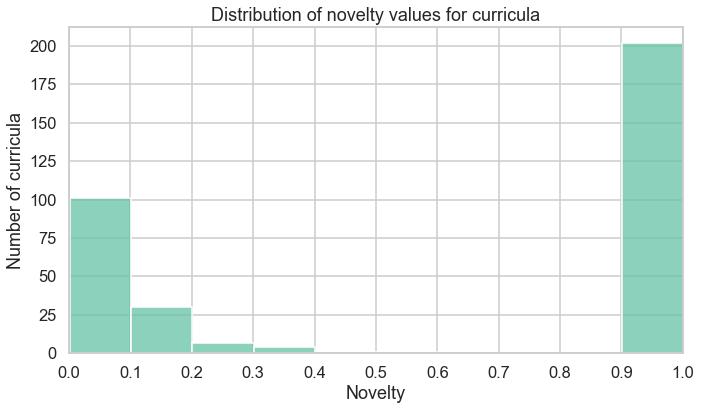

In [236]:
plt.figure(figsize=(11, 6))
plt.title(f"Distribution of novelty values for curricula")
plt.xticks(np.arange(0,1.1,0.1))
plt.xlim(0,1)
sns.histplot(data=tot, x="novelty", binwidth=0.1)
plt.xlabel("Novelty")
plt.ylabel("Number of curricula")
plt.show()

In [51]:
tot.query("novelty>=0 & novelty < 0.1")

,up_id,up_title,n_courses,n_clusters,modularity,diversity,inside_distance,rf,Год,Квалификация,embed,num_of_disciplines,entropy,vector,novelty
39,6891,Оптико-электронные информационно-измерительные...,52,8,0.552,0.738587,0.586435,Реальные данные,2019,Бакалавриат,"[4.62857143, 1.125, 1.0, 5.72619048, 1.8210678...",52,0.312228,"[67.0, 33.0, 7.0, 82.0, 15.0, 12.0, 13.0, 12.0...",0.017183
43,6918,Мобильные и сетевые технологии,40,9,0.516,0.776846,0.628852,Реальные данные,2019,Бакалавриат,"[2.38015873, 1.11111111, 0.25, 1.11111111, 0.1...",40,0.349501,"[57.0, 19.0, 2.0, 47.0, 4.0, 12.0, 34.0, 67.0,...",0.024333
45,6920,Нейротехнологии и программирование,47,9,0.614,0.775207,0.461273,Реальные данные,2019,Бакалавриат,"[4.57896825, 2.3, 0.0, 1.61111111, 1.8, 0.2539...",47,0.302232,"[82.0, 64.0, 0.0, 34.0, 16.0, 3.0, 24.0, 14.0,...",0.006916
46,6921,Системное и прикладное программное обеспечение,49,7,0.578,0.662681,0.470075,Реальные данные,2019,Бакалавриат,"[4.92857143, 2.3, 0.0, 1.06944444, 1.0, 0.1428...",49,0.318205,"[71.0, 64.0, 0.0, 29.0, 12.0, 2.0, 26.0, 30.0,...",0.003797
48,6925,Управление технологическими инновациями,56,7,0.328,0.567760,0.493999,Реальные данные,2019,Бакалавриат,"[2.79166667, 1.0, 0.0, 0.16666667, 0.0, 3.5166...",56,0.397997,"[58.0, 18.0, 0.0, 34.0, 2.0, 30.0, 231.0, 14.0...",0.001064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,7219,Управление качеством,82,12,0.583,0.789652,0.704036,Реальные данные,2022,Магистратура,"[4.4765873, 0.0, 0.0, 0.62896825, 0.0, 11.7222...",75,0.317109,"[17.0, 0.0, 0.0, 4.0, 0.0, 54.0, 98.0, 10.0, 4...",0.083330
320,7221,Инновационное предпринимательство / Innovation...,120,10,0.656,0.706861,0.457763,Реальные данные,2022,Магистратура,"[10.03214286, 0.0, 0.0, 0.37896825, 0.0, 11.95...",111,0.323915,"[32.0, 0.0, 0.0, 3.0, 0.0, 65.0, 150.0, 3.0, 7...",0.034323
321,7222,Инновационный маркетинг,57,7,0.598,0.634082,0.591290,Реальные данные,2022,Магистратура,"[1.18214286, 0.0, 0.0, 0.14285714, 0.0, 3.2222...",54,0.461422,"[8.0, 0.0, 0.0, 1.0, 0.0, 5.0, 134.0, 2.0, 4.0...",0.047250
324,7225,"Технонаука, инновации, экономика",78,9,0.656,0.710501,0.576033,Реальные данные,2022,Магистратура,"[6.19880952, 0.125, 0.0, 0.37896825, 0.0, 13.0...",72,0.352411,"[20.0, 1.0, 0.0, 3.0, 0.0, 37.0, 77.0, 1.0, 4....",0.075288


In [52]:
tot.query("up_title == 'Компьютерные системы и технологии'")

,up_id,up_title,n_courses,n_clusters,modularity,diversity,inside_distance,rf,Год,Квалификация,embed,num_of_disciplines,entropy,vector,novelty
55,6936,Компьютерные системы и технологии,43,7,0.544,0.711304,0.414691,Реальные данные,2019,Бакалавриат,"[3.17857143, 2.3, 0.0, 1.2020202, 1.0, 0.30952...",43,0.294923,"[64.0, 64.0, 0.0, 30.0, 12.0, 3.0, 21.0, 13.0,...",1.000000
71,6975,Компьютерные системы и технологии,49,7,0.552,0.725032,0.484123,Реальные данные,2020,Бакалавриат,"[3.17857143, 2.3, 0.0, 2.16035354, 1.0, 0.3095...",49,0.296250,"[64.0, 64.0, 0.0, 43.0, 12.0, 3.0, 21.0, 28.0,...",0.012836
104,7137,Компьютерные системы и технологии,52,8,0.557,0.731319,0.505834,Реальные данные,2021,Бакалавриат,"[2.67857143, 3.3, 0.0, 2.46987734, 1.0, 0.3095...",52,0.302444,"[71.0, 50.0, 0.0, 55.0, 12.0, 11.0, 22.0, 27.0...",0.014445
115,7228,Компьютерные системы и технологии,54,7,0.483,0.665578,0.363077,Реальные данные,2022,Бакалавриат,"[6.11111111, 0.44285714, 0.0, 5.31709957, 1.0,...",54,0.300995,"[60.0, 4.0, 0.0, 40.0, 11.0, 3.0, 10.0, 35.0, ...",0.073843
176,7024,Компьютерные системы и технологии,32,7,0.371,0.733728,0.557891,Реальные данные,2020,Магистратура,"[2.125, 0.0, 0.0, 1.38596491, 0.25, 1.16666667...",32,0.343233,"[35.0, 0.0, 0.0, 4.0, 1.0, 2.0, 21.0, 8.0, 2.0...",1.000000
236,7106,Компьютерные системы и технологии,38,8,0.442,0.733242,0.585314,Реальные данные,2021,Магистратура,"[2.51071429, 0.0, 0.0, 1.49707602, 0.25, 2.166...",38,0.339125,"[38.0, 0.0, 0.0, 5.0, 1.0, 3.0, 22.0, 9.0, 4.0...",0.020328
285,7183,Компьютерные системы и технологии,64,6,0.714,0.765483,0.624528,Реальные данные,2022,Магистратура,"[3.5234127, 0.0, 0.0, 3.4047619, 0.25, 1.72222...",61,0.318759,"[30.0, 0.0, 0.0, 11.0, 1.0, 5.0, 34.0, 22.0, 2...",0.134628


In [53]:
tot["Q"] = tot["entropy"]*0.4+tot["diversity"]*0.4+tot["novelty"]*0.2
tot["Q"].describe()

count    346.000000
mean       0.565278
std        0.106314
min        0.228780
25%        0.458099
50%        0.601438
75%        0.651110
max        0.752974
Name: Q, dtype: float64

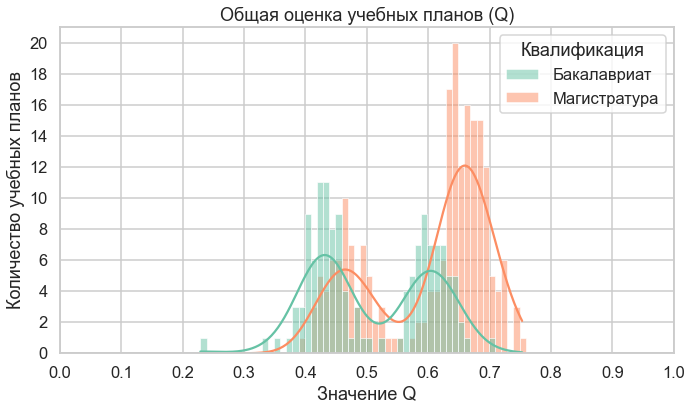

In [54]:
plt.figure(figsize=(11, 6))
plt.title(f"Общая оценка учебных планов (Q)")
plt.xticks(np.arange(0,1.1,0.1))
plt.yticks(np.arange(0,22,2))
plt.xlim(0,1)
sns.histplot(data=tot, x="Q", binwidth=0.01, hue="Квалификация", kde=True)
plt.xlabel("Значение Q")
plt.ylabel("Количество учебных планов")
plt.show()

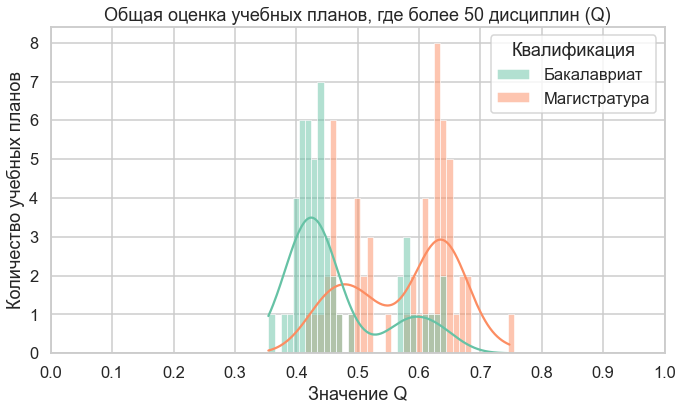

In [55]:
plt.figure(figsize=(11, 6))
plt.title(f"Общая оценка учебных планов, где более 50 дисциплин (Q)")
plt.xticks(np.arange(0,1.1,0.1))
plt.yticks(np.arange(0,22,1))
plt.xlim(0,1)
sns.histplot(data=tot.query("n_courses>50"), x="Q", binwidth=0.01, hue="Квалификация", kde=True)
plt.xlabel("Значение Q")
plt.ylabel("Количество учебных планов")
plt.show()

Вывод: значение общей метрики отчасти зависит от количества дисциплин в учебном плане. При неполных планах значение для магистратуры ниже, для бакалавриата - выше.

## Эксперименты с данными по КЦП

In [56]:
tot

,up_id,up_title,n_courses,n_clusters,modularity,diversity,inside_distance,rf,Год,Квалификация,embed,num_of_disciplines,entropy,vector,novelty,Q
0,6859,Нанофотоника и квантовая оптика,47,9,0.603,0.613275,0.533947,Реальные данные,2018,Бакалавриат,"[2.80555556, 1.31111111, 1.25, 2.81904762, 1.8...",47,0.317040,"[57.0, 33.0, 8.0, 46.0, 14.0, 11.0, 8.0, 12.0,...",1.0,0.572126
1,6860,Информационные технологии в энергетике,47,7,0.578,0.673858,0.516951,Реальные данные,2018,Бакалавриат,"[2.225, 1.86785714, 0.96071429, 1.85119048, 2....",47,0.366740,"[58.0, 37.0, 6.0, 38.0, 16.0, 47.0, 4.0, 10.0,...",1.0,0.616239
2,6862,Низкотемпературная техника и энергетика,22,3,0.227,0.493239,0.461125,Реальные данные,2018,Бакалавриат,"[1.1, 1.16666667, 0.39285714, 0.14285714, 0.24...",22,0.402676,"[50.0, 32.0, 2.0, 29.0, 3.0, 25.0, 4.0, 10.0, ...",1.0,0.558366
3,6863,Экологический инжиниринг,23,3,0.444,0.520471,0.518674,Реальные данные,2018,Бакалавриат,"[1.1, 1.16666667, 0.25, 0.14285714, 0.24285714...",23,0.426929,"[31.0, 31.0, 1.0, 10.0, 3.0, 18.0, 1.0, 10.0, ...",1.0,0.578960
4,6864,Пищевая биотехнология,23,5,0.720,0.576878,0.538592,Реальные данные,2018,Бакалавриат,"[1.1, 1.16666667, 0.25, 0.14285714, 0.35396825...",23,0.435439,"[50.0, 32.0, 1.0, 29.0, 5.0, 18.0, 4.0, 10.0, ...",1.0,0.604927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,7265,Индустриальная биотехнология,32,7,0.428,0.684646,0.767358,Реальные данные,2022,Магистратура,"[0.47777778, 0.14285714, 0.0, 0.0, 0.0, 1.3333...",30,0.442889,"[3.0, 1.0, 0.0, 0.0, 0.0, 4.0, 16.0, 0.0, 2.0,...",1.0,0.651014
342,7267,Техническое зрение,64,6,0.644,0.740164,0.626647,Реальные данные,2022,Магистратура,"[3.74246032, 0.0, 0.0, 8.41666667, 1.56666667,...",63,0.336381,"[31.0, 0.0, 0.0, 44.0, 6.0, 4.0, 34.0, 2.0, 13...",1.0,0.630618
343,7268,Роботизация химических технологий,38,7,0.635,0.778007,0.695251,Реальные данные,2022,Магистратура,"[1.95, 0.33333333, 0.0, 2.1047619, 0.125, 0.33...",36,0.368837,"[11.0, 1.0, 0.0, 14.0, 1.0, 1.0, 32.0, 1.0, 2....",1.0,0.658738
344,7285,Инженерия машинного обучения,51,8,0.370,0.743428,0.571487,Реальные данные,2022,Магистратура,"[9.30866911, 0.16666667, 0.0, 3.7297619, 0.375...",50,0.388078,"[77.0, 1.0, 0.0, 26.0, 2.0, 4.0, 4.0, 2.0, 0.0...",1.0,0.652603


In [122]:
kcp_init = pd.read_excel("kcp.xlsx")
kcp_init["code"] = kcp_init["specialization"].apply(lambda x: x.split()[0])
kcp_init

,specialization,total_budg,"Из всего по особой квоте, бюджет","Из всего по целевой квоте, бюджет","Из всего по специальной квоте, бюджет",contract,Контракт для иностранцев,min_points,mean_points,group,code
0,01.03.02 «Прикладная математика и информатика»,160,16,NaN,16,90,20,305,99.3,Информационные технологии,01.03.02
1,03.03.02 «Физика»,0,0,NaN,0,10,0,233,93.0,Физика,03.03.02
2,05.03.06 «Экология и природопользование»,30,3,NaN,3,10,10,212,82.3,Науки о жизни,05.03.06
3,09.03.01 «Информатика и вычислительная техника,30,3,NaN,3,40,20,281,95.7,Информационные технологии,09.03.01
4,09.03.02 «Информационные системы и технологии»,135,14,NaN,14,350,20,290,97.4,Информационные технологии,09.03.02
5,09.03.03 «Прикладная информатика»,30,3,NaN,3,60,20,300,98.7,Информационные технологии,09.03.03
6,09.03.04 «Программная инженерия»,140,14,NaN,14,260,20,302,98.8,Информационные технологии,09.03.04
7,10.03.01 «Информационная безопасность»,95,10,NaN,10,90,20,270,92.5,Информационные технологии,10.03.01
8,11.03.02 «Инфокоммуникационные технологии и си...,65,7,NaN,7,50,10,277,91.9,Информационные технологии,11.03.02
9,11.03.03 «Конструирование и технология электро...,15,2,NaN,2,10,10,263,90.4,Информационные технологии,11.03.03


In [66]:
kcp.shape

(27, 11)

In [58]:
transit = pd.read_excel("transit.xls")
transit

,УЧ_ГОД,ОТКУДА_ШИФР,ОТКУДА_ОП,КУДА_ШИФР,КУДА_ОП,ТИП_ДВИЖ,COUNT(ЧЛВК_ИД)
0,2017/2018,NaN,NaN,09.02.03,Программирование в компьютерных системах,восстановление,1
1,2018/2019,01.03.02,Информатика и программирование,01.03.02,Математическое моделирование,перевод,14
2,2018/2019,01.03.02,Информатика и программирование,09.03.02,Программирование и интернет-технологии,перевод,3
3,2018/2019,01.03.02,Информатика и программирование,09.03.03,Корпоративные информационные системы,перевод,1
4,2018/2019,01.03.02,Математические модели и алгоритмы в разработке...,01.03.02,Информатика и программирование,перевод,1
...,...,...,...,...,...,...,...
1600,2023/2024,NaN,NaN,38.04.05,Стратегии и технологии цифровой трансформации ...,восстановление,1
1601,2023/2024,NaN,NaN,44.03.04,Компьютерные технологии в дизайне,восстановление,3
1602,2023/2024,NaN,NaN,45.03.04,Иностранные языки и информационные технологии ...,восстановление,1
1603,2023/2024,NaN,NaN,45.03.04,Интеллектуальные системы в гуманитарной сфере,перевод,3


In [62]:
transit.loc[transit["УЧ_ГОД"].isin(["2023/2024"])]

,УЧ_ГОД,ОТКУДА_ШИФР,ОТКУДА_ОП,КУДА_ШИФР,КУДА_ОП,ТИП_ДВИЖ,COUNT(ЧЛВК_ИД)
1337,2023/2024,01.03.02,Компьютерные технологии: Программирование и ис...,09.03.02,Разработка программного обеспечения / Software...,перевод,5
1338,2023/2024,01.03.02,Компьютерные технологии: Программирование и ис...,09.03.03,Мобильные и сетевые технологии,перевод,3
1339,2023/2024,01.03.02,Компьютерные технологии: Программирование и ис...,09.03.04,Нейротехнологии и программирование,перевод,2
1340,2023/2024,01.03.02,Компьютерные технологии: Программирование и ис...,10.03.01,Технологии защиты информации,перевод,2
1341,2023/2024,01.03.02,Компьютерные технологии: Программирование и ис...,11.03.02,Программирование в инфокоммуникационных системах,перевод,1
...,...,...,...,...,...,...,...
1600,2023/2024,NaN,NaN,38.04.05,Стратегии и технологии цифровой трансформации ...,восстановление,1
1601,2023/2024,NaN,NaN,44.03.04,Компьютерные технологии в дизайне,восстановление,3
1602,2023/2024,NaN,NaN,45.03.04,Иностранные языки и информационные технологии ...,восстановление,1
1603,2023/2024,NaN,NaN,45.03.04,Интеллектуальные системы в гуманитарной сфере,перевод,3


In [67]:
kcp = pd.merge(kcp, transit.loc[transit["УЧ_ГОД"].isin(["2023/2024"])][["КУДА_ШИФР", "КУДА_ОП"]], left_on="code", right_on="КУДА_ШИФР", how="left").drop_duplicates()

In [69]:
kcp.dropna(subset=["КУДА_ШИФР"], inplace=True)

In [90]:
tot["Q1"] = tot["diversity"]*0.5+tot["entropy"]*0.5
merged = pd.merge(kcp, tot, left_on="КУДА_ОП", right_on="up_title")
merged

,specialization,total_budg,"Из всего по особой квоте, бюджет","Из всего по целевой квоте, бюджет","Из всего по специальной квоте, бюджет",contract,Контракт для иностранцев,min_points,mean_points,group,code,КУДА_ШИФР,КУДА_ОП,up_id,up_title,n_courses,n_clusters,modularity,diversity,inside_distance,rf,Год,Квалификация,embed,num_of_disciplines,entropy,vector,novelty,Q,Q1
0,01.03.02 «Прикладная математика и информатика»,160,16,NaN,16,90,20,305,99.3,Информационные технологии,01.03.02,01.03.02,Компьютерные технологии: Программирование и ис...,7226,Компьютерные технологии: Программирование и ис...,44,7,0.628,0.735886,0.485642,Реальные данные,2022,Бакалавриат,"[3.425, 4.14090909, 0.0, 2.73333333, 2.75, 0.4...",43,0.376965,"[26.0, 32.0, 0.0, 16.0, 14.0, 3.0, 2.0, 4.0, 0...",1.000000,0.645141,0.556426
1,01.03.02 «Прикладная математика и информатика»,160,16,NaN,16,90,20,305,99.3,Информационные технологии,01.03.02,01.03.02,Информатика и программирование,6881,Информатика и программирование,28,6,0.570,0.761996,0.610343,Реальные данные,2018,Бакалавриат,"[5.25, 2.16666667, 0.0, 0.47619048, 1.0, 0.0, ...",28,0.363252,"[73.0, 21.0, 0.0, 27.0, 15.0, 0.0, 5.0, 41.0, ...",1.000000,0.650099,0.562624
2,01.03.02 «Прикладная математика и информатика»,160,16,NaN,16,90,20,305,99.3,Информационные технологии,01.03.02,01.03.02,Информатика и программирование,6929,Информатика и программирование,45,10,0.789,0.828082,0.661966,Реальные данные,2019,Бакалавриат,"[5.46111111, 3.16666667, 0.45, 0.33333333, 2.1...",45,0.336221,"[71.0, 24.0, 2.0, 31.0, 18.0, 2.0, 14.0, 42.0,...",0.181978,0.502117,0.582151
3,01.03.02 «Прикладная математика и информатика»,160,16,NaN,16,90,20,305,99.3,Информационные технологии,01.03.02,01.03.02,Информатика и программирование,6974,Информатика и программирование,65,10,0.744,0.831992,0.638469,Реальные данные,2020,Бакалавриат,"[9.16944444, 4.55, 0.0, 1.88095238, 3.5, 0.1, ...",64,0.336578,"[96.0, 27.0, 0.0, 52.0, 41.0, 2.0, 15.0, 44.0,...",0.086747,0.484777,0.584285
4,01.03.02 «Прикладная математика и информатика»,160,16,NaN,16,90,20,305,99.3,Информационные технологии,01.03.02,01.03.02,Информатика и программирование,7136,Информатика и программирование,47,11,0.800,0.812049,0.651570,Реальные данные,2021,Бакалавриат,"[5.61111111, 4.16666667, 0.0, 0.64285714, 2.66...",47,0.359704,"[79.0, 29.0, 0.0, 43.0, 28.0, 10.0, 11.0, 32.0...",0.061415,0.480984,0.585876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,45.03.04 «Интеллектуальные системы в гуманитар...,30,3,NaN,3,90,10,280,97.3,Информационные технологии,45.03.04,45.03.04,Интеллектуальные системы в гуманитарной сфере,6906,Интеллектуальные системы в гуманитарной сфере,38,8,0.546,0.717036,0.505412,Реальные данные,2018,Бакалавриат,"[6.5968254, 1.11111111, 0.1, 1.2020202, 1.0769...",36,0.351292,"[88.0, 26.0, 1.0, 28.0, 3.0, 11.0, 19.0, 26.0,...",1.000000,0.627331,0.534164
152,45.03.04 «Интеллектуальные системы в гуманитар...,30,3,NaN,3,90,10,280,97.3,Информационные технологии,45.03.04,45.03.04,Интеллектуальные системы в гуманитарной сфере,6940,Интеллектуальные системы в гуманитарной сфере,44,8,0.489,0.728546,0.592769,Реальные данные,2019,Бакалавриат,"[10.7968254, 1.11111111, 0.1, 2.2020202, 1.076...",42,0.377223,"[131.0, 26.0, 1.0, 68.0, 4.0, 12.0, 19.0, 28.0...",0.018806,0.446069,0.552884
153,45.03.04 «Интеллектуальные системы в гуманитар...,30,3,NaN,3,90,10,280,97.3,Информационные технологии,45.03.04,45.03.04,Интеллектуальные системы в гуманитарной сфере,7081,Интеллектуальные системы в гуманитарной сфере,45,10,0.601,0.715653,0.637669,Реальные данные,2020,Бакалавриат,"[8.68015873, 1.44444444, 0.1, 2.4520202, 0.076...",43,0.393173,"[113.0, 27.0, 1.0, 51.0, 3.0, 12.0, 18.0, 26.0...",0.034827,0.450496,0.554413
154,45.03.04 «Интеллектуальные системы в гуманитар...,30,3,NaN,3,90,10,280,97.3,Информационные технологии,45.03.04,45.03.04,Интеллектуальные системы в гуманитарной сфере,7162,Интеллектуальные системы в гуманитарной с

In [123]:
kcp_init["places"] = kcp_init["total_budg"]+kcp_init["contract"]+kcp_init["Контракт для иностранцев"]

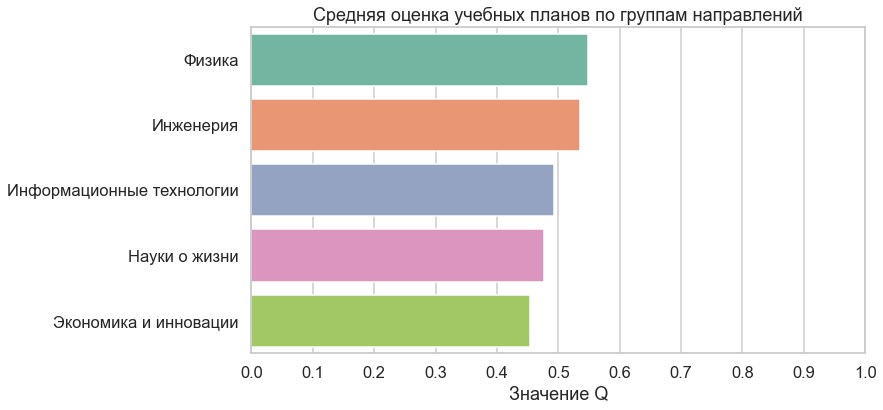

In [91]:
plt.figure(figsize=(11, 6))
plt.title(f"Средняя оценка учебных планов по группам направлений")
plt.xticks(np.arange(0,1.1,0.1))
plt.yticks(np.arange(0,22,1))
plt.xlim(0,1)
sns.barplot(data=merged.groupby(["group"])["Q"].mean().reset_index().sort_values(by="Q", ascending=False), x="Q", y="group")
plt.xlabel("Значение Q")
plt.ylabel("")
plt.show()

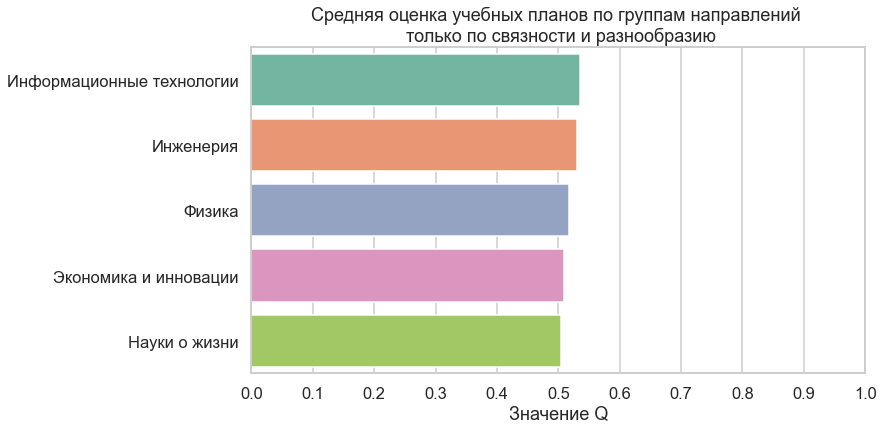

In [92]:
plt.figure(figsize=(11, 6))
plt.title(f"Средняя оценка учебных планов по группам направлений \n только по связности и разнообразию")
plt.xticks(np.arange(0,1.1,0.1))
plt.yticks(np.arange(0,22,1))
plt.xlim(0,1)
sns.barplot(data=merged.groupby(["group"])["Q1"].mean().reset_index().sort_values(by="Q1", ascending=False), x="Q1", y="group")
plt.xlabel("Значение Q")
plt.ylabel("")
plt.show()

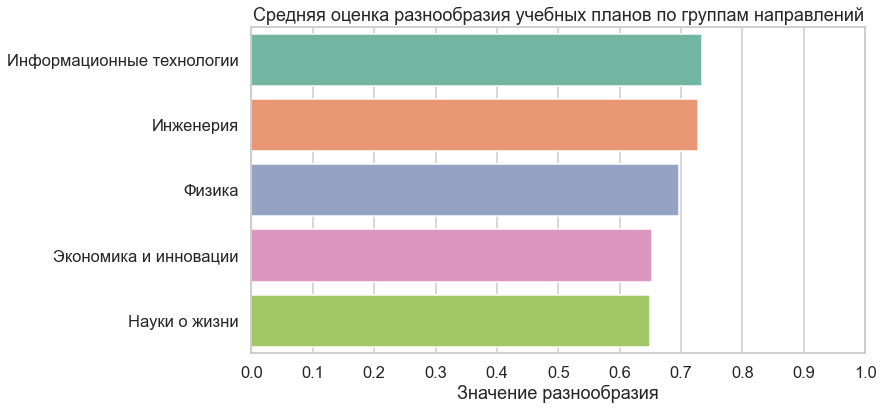

In [93]:
plt.figure(figsize=(11, 6))
plt.title(f"Средняя оценка разнообразия учебных планов по группам направлений")
plt.xticks(np.arange(0,1.1,0.1))
plt.yticks(np.arange(0,22,1))
plt.xlim(0,1)
sns.barplot(data=merged.groupby(["group"])["diversity"].median().reset_index().sort_values(by="diversity", ascending=False), x="diversity", y="group")
plt.xlabel("Значение разнообразия")
plt.ylabel("")
plt.show()

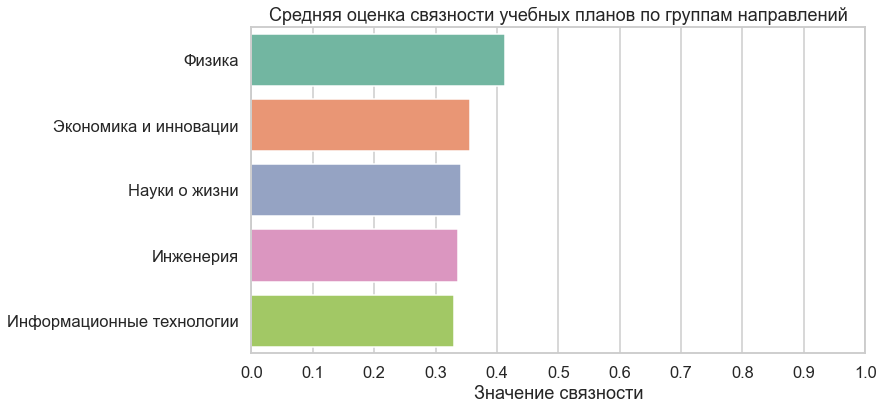

In [94]:
plt.figure(figsize=(11, 6))
plt.title(f"Средняя оценка связности учебных планов по группам направлений")
plt.xticks(np.arange(0,1.1,0.1))
plt.yticks(np.arange(0,22,1))
plt.xlim(0,1)
sns.barplot(data=merged.groupby(["group"])["entropy"].median().reset_index().sort_values(by="entropy", ascending=False), x="entropy", y="group")
plt.xlabel("Значение связности")
plt.ylabel("")
plt.show()

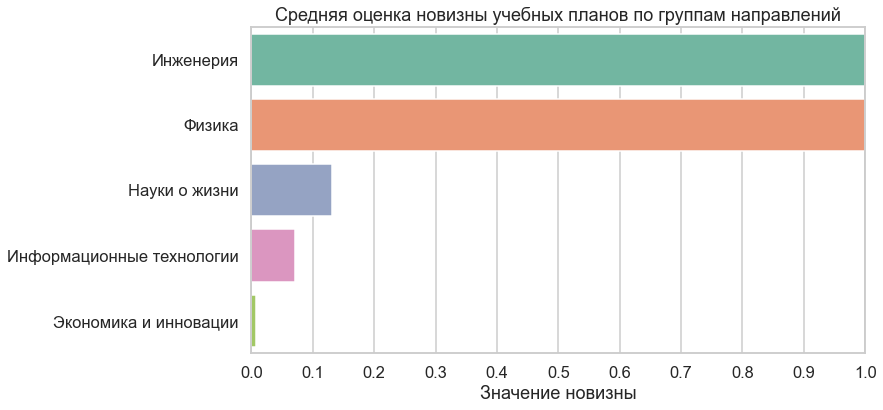

In [95]:
plt.figure(figsize=(11, 6))
plt.title(f"Средняя оценка новизны учебных планов по группам направлений")
plt.xticks(np.arange(0,1.1,0.1))
plt.yticks(np.arange(0,22,1))
plt.xlim(0,1)
sns.barplot(data=merged.groupby(["group"])["novelty"].median().reset_index().sort_values(by="novelty", ascending=False), x="novelty", y="group")
plt.xlabel("Значение новизны")
plt.ylabel("")
plt.show()

С точки зрения здравого смысла, результат очень логичный.

Посмотрим, что по популярности в плане бюджетных мест.

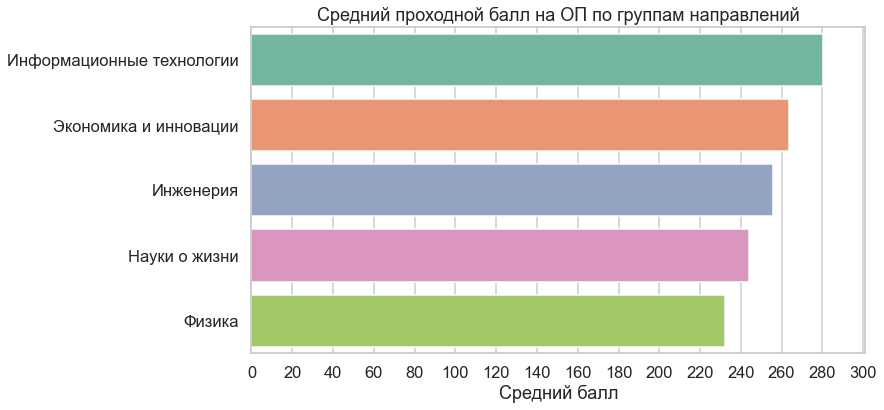

In [124]:
plt.figure(figsize=(11, 6))
plt.title(f"Средний проходной балл на ОП по группам направлений")
plt.xticks(np.arange(0,301,20))
plt.xlim(0,301)
sns.barplot(data=kcp_init.groupby(["group"])["min_points"].median().reset_index().sort_values(by="min_points", ascending=False), x="min_points", y="group")
plt.xlabel("Средний балл")
plt.ylabel("")
plt.show()

In [117]:
merged["total_cont"] = merged["Контракт для иностранцев"]+merged["contract"]

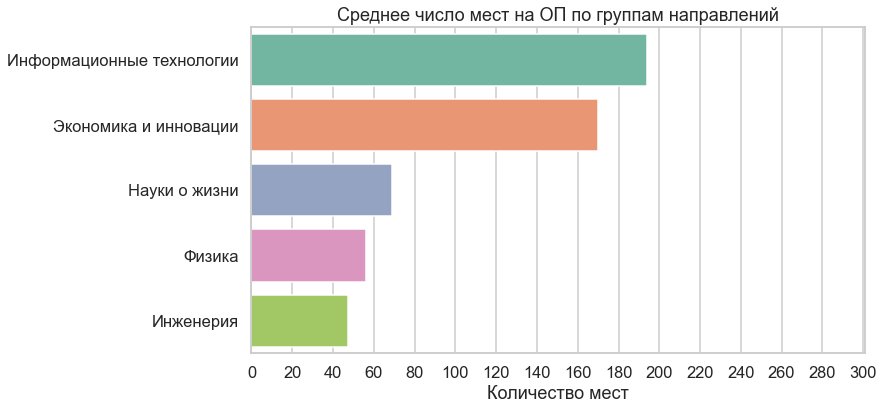

In [128]:
plt.figure(figsize=(11, 6))
plt.title(f"Среднее число мест на ОП по группам направлений")
plt.xticks(np.arange(0,301,20))
plt.xlim(0,301)
sns.barplot(data=kcp_init.groupby(["group"])["places"].mean().reset_index().sort_values(by="places", ascending=False), x="places", y="group")
plt.xlabel("Количество мест")
plt.ylabel("")
plt.show()

In [141]:
merged.query("group=='Информационные технологии'&Год==2022").drop_duplicates(subset=["specialization"]).nlargest(n=5,columns=["places"])

,specialization,total_budg,"Из всего по особой квоте, бюджет","Из всего по целевой квоте, бюджет","Из всего по специальной квоте, бюджет",contract,Контракт для иностранцев,min_points,mean_points,group,code,КУДА_ШИФР,КУДА_ОП,up_id,up_title,n_courses,n_clusters,modularity,diversity,inside_distance,rf,Год,Квалификация,embed,num_of_disciplines,entropy,vector,novelty,Q,Q1,places,total_cont
14,09.03.02 «Информационные системы и технологии»,135,14,NaN,14,350,20,290,97.4,Информационные технологии,09.03.02,09.03.02,Разработка программного обеспечения / Software...,7229,Разработка программного обеспечения / Software...,22,6,0.518,0.705235,0.727454,Реальные данные,2022,Бакалавриат,"[1.0, 4.16666667, 0.0, 0.33333333, 1.49007937,...",22,0.416334,"[6.0, 34.0, 0.0, 2.0, 8.0, 1.0, 2.0, 2.0, 0.0,...",1.000000,0.648628,0.560784,505,370
35,09.03.04 «Программная инженерия»,140,14,NaN,14,260,20,302,98.8,Информационные технологии,09.03.04,09.03.04,Нейротехнологии и программирование,7233,Нейротехнологии и программирование,51,9,0.591,0.683550,0.463264,Реальные данные,2022,Бакалавриат,"[8.50793651, 0.44285714, 0.0, 5.35119048, 1.0,...",51,0.297994,"[75.0, 4.0, 0.0, 43.0, 11.0, 2.0, 15.0, 12.0, ...",0.067212,0.406060,0.490772,420,280
0,01.03.02 «Прикладная математика и информатика»,160,16,NaN,16,90,20,305,99.3,Информационные технологии,01.03.02,01.03.02,Компьютерные технологии: Программирование и ис...,7226,Компьютерные технологии: Программирование и ис...,44,7,0.628,0.735886,0.485642,Реальные данные,2022,Бакалавриат,"[3.425, 4.14090909, 0.0, 2.73333333, 2.75, 0.4...",43,0.376965,"[26.0, 32.0, 0.0, 16.0, 14.0, 3.0, 2.0, 4.0, 0...",1.000000,0.645141,0.556426,270,110
58,10.03.01 «Информационная безопасность»,95,10,NaN,10,90,20,270,92.5,Информационные технологии,10.03.01,10.03.01,Технологии защиты информации,7266,Технологии защиты информации,58,10,0.457,0.777774,0.686060,Реальные данные,2022,Бакалавриат,"[5.19087302, 7.33333333, 0.0, 2.7754329, 1.267...",58,0.287641,"[28.0, 68.0, 0.0, 8.0, 4.0, 3.0, 9.0, 12.0, 11...",0.057726,0.437711,0.532707,205,110
150,45.03.04 «Интеллектуальные системы в гуманитар...,30,3,NaN,3,90,10,280,97.3,Информационные технологии,45.03.04,45.03.04,Иностранные языки и информационные технологии ...,7246,Иностранные языки и информационные технологии ...,49,7,0.636,0.710449,0.470633,Реальные данные,2022,Бакалавриат,"[9.22063492, 4.33333333, 0.0, 4.0, 0.67692308,...",48,0.356169,"[71.0, 59.0, 0.0, 29.0, 7.0, 12.0, 12.0, 21.0,...",0.127139,0.452075,0.533309,130,100


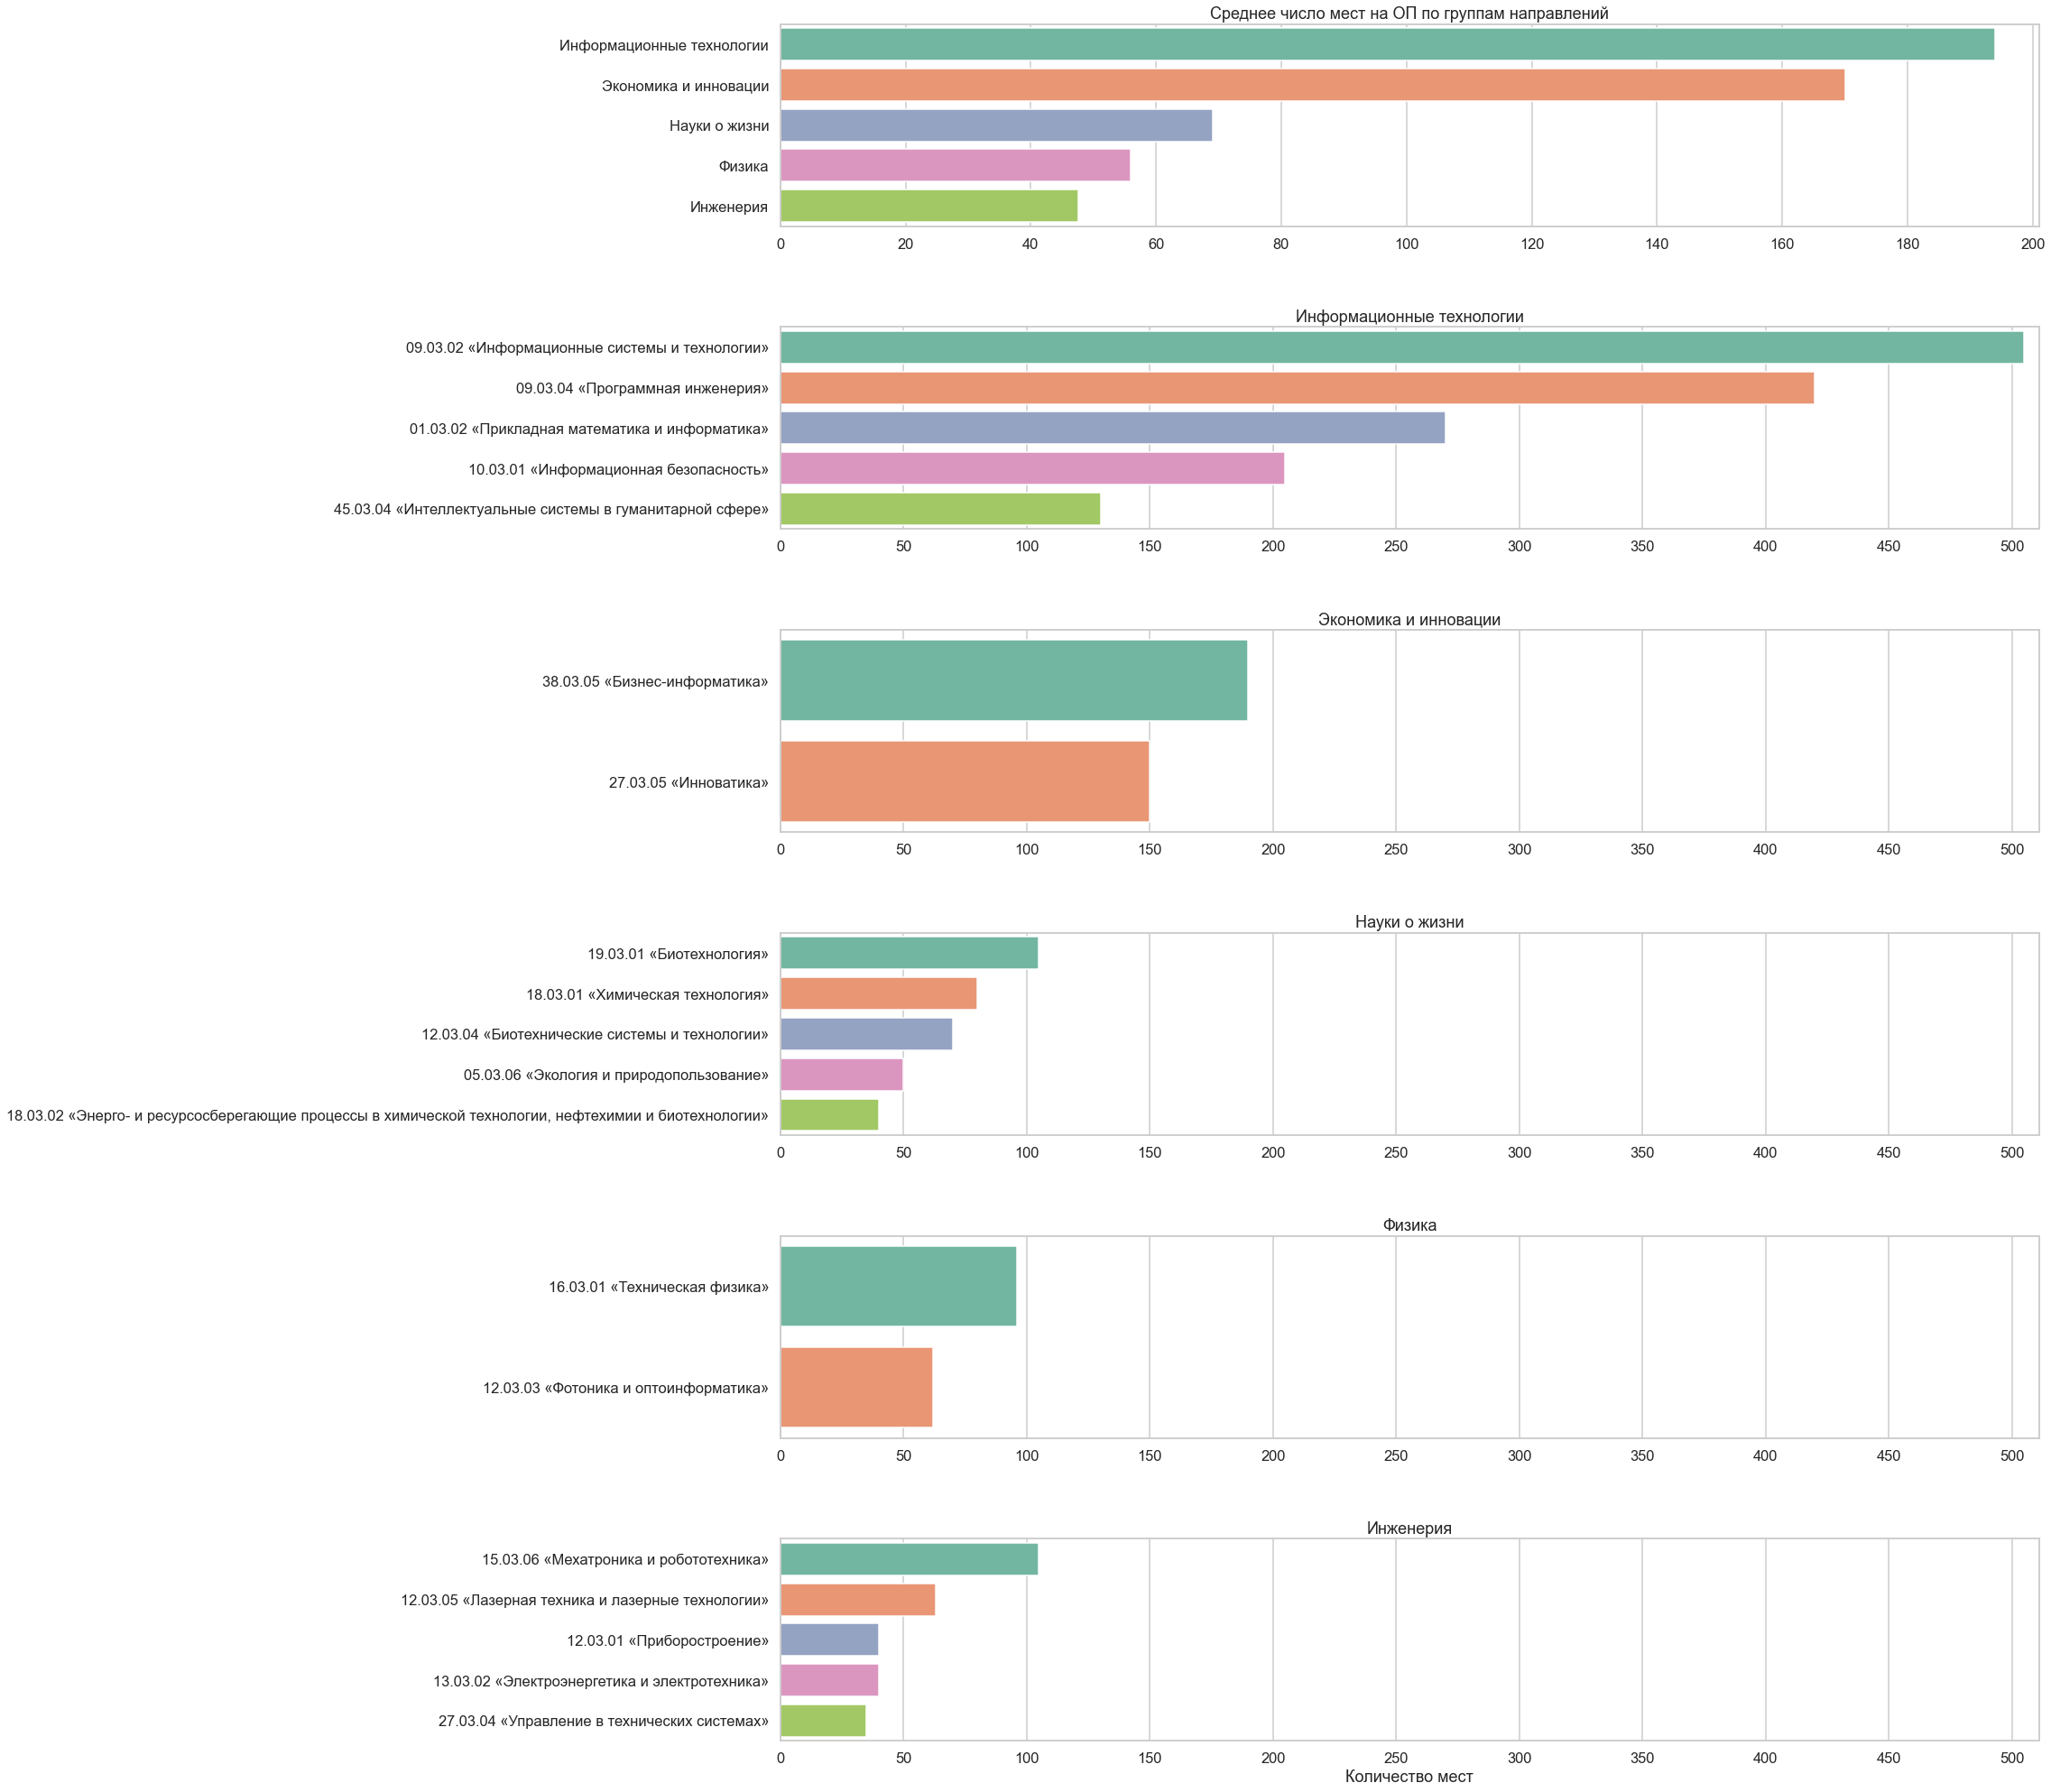

In [165]:
fig, axis = plt.subplots(6, figsize=(25, 35))

axis[0].set_title(f"Среднее число мест на ОП по группам направлений")
axis[0].set_xticks(np.arange(0,201,20))
axis[0].set_xlim(0,201)
sns.barplot(ax=axis[0], data=kcp_init.groupby(["group"])["places"].mean().reset_index().sort_values(by="places", ascending=False), x="places", y="group")
axis[0].set_xlabel("")
axis[0].set_ylabel("")

axis[1].set_title(f"Информационные технологии")
axis[1].set_xticks(np.arange(0,511,50))
axis[1].set_xlim(0,511)
sns.barplot(ax=axis[1], 
            data=merged.query("group=='Информационные технологии'&Год==2022").drop_duplicates(subset=["specialization"]).nlargest(n=5,columns=["places"]).sort_values(by="places", ascending=False), 
            x="places", y="specialization")
axis[1].set_xlabel("")
axis[1].set_ylabel("")

axis[2].set_title(f"Экономика и инновации")
axis[2].set_xticks(np.arange(0,511,50))
axis[2].set_xlim(0,511)
sns.barplot(ax=axis[2], 
            data=merged.query("group=='Экономика и инновации'&Год==2022").drop_duplicates(subset=["specialization"]).nlargest(n=5,columns=["places"]).sort_values(by="places", ascending=False), 
            x="places", y="specialization")
axis[2].set_xlabel("")
axis[2].set_ylabel("")

axis[3].set_title(f"Науки о жизни")
axis[3].set_xticks(np.arange(0,511,50))
axis[3].set_xlim(0,511)
sns.barplot(ax=axis[3], 
            data=merged.query("group=='Науки о жизни'&Год==2022").drop_duplicates(subset=["specialization"]).nlargest(n=5,columns=["places"]).sort_values(by="places", ascending=False), 
            x="places", y="specialization")
axis[3].set_xlabel("")
axis[3].set_ylabel("")

axis[4].set_title(f"Физика")
axis[4].set_xticks(np.arange(0,511,50))
axis[4].set_xlim(0,511)
sns.barplot(ax=axis[4], 
            data=merged.query("group=='Физика'&Год==2022").drop_duplicates(subset=["specialization"]).nlargest(n=5,columns=["places"]).sort_values(by="places", ascending=False), 
            x="places", y="specialization")
axis[4].set_xlabel("")
axis[4].set_ylabel("")

axis[5].set_title(f"Инженерия")
axis[5].set_xticks(np.arange(0,511,50))
axis[5].set_xlim(0,511)
sns.barplot(ax=axis[5], 
            data=merged.query("group=='Инженерия'&Год==2022").drop_duplicates(subset=["specialization"]).nlargest(n=5,columns=["places"]).sort_values(by="places", ascending=False), 
            x="places", y="specialization")
axis[5].set_xlabel("Количество мест")
axis[5].set_ylabel("")

plt.subplots_adjust(hspace=0.5)
plt.show()

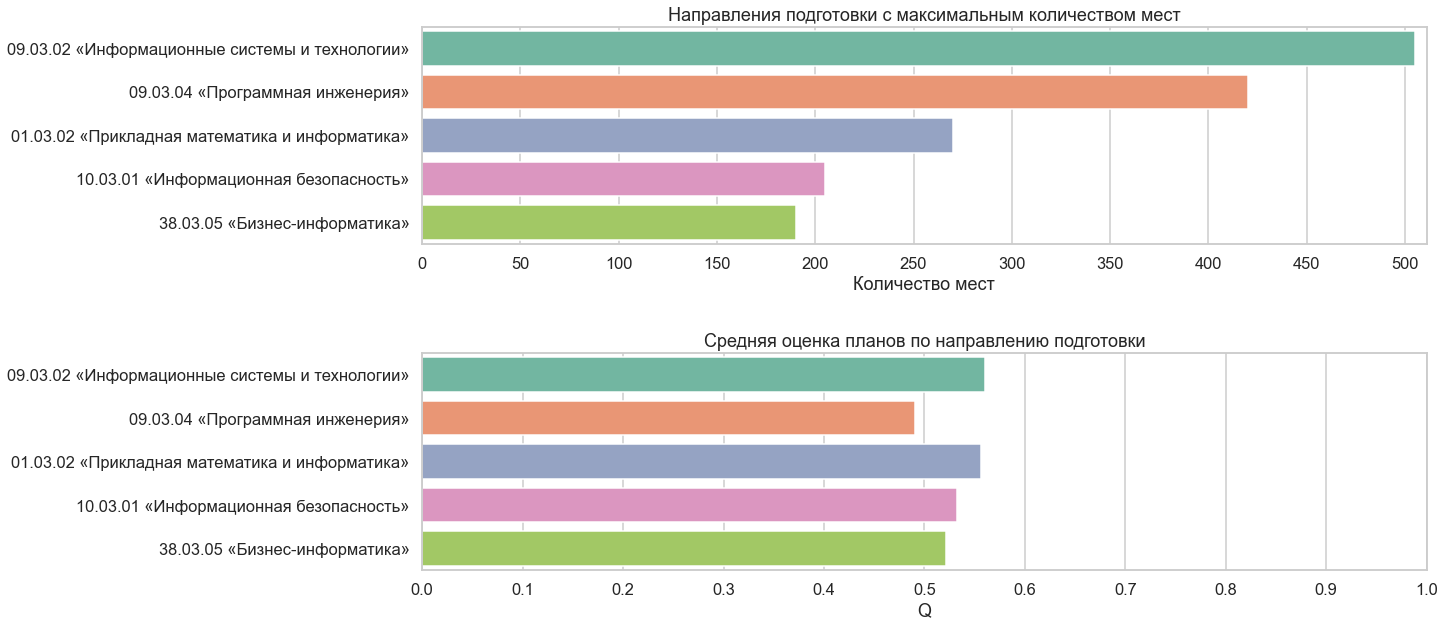

In [197]:
fig, axis = plt.subplots(2, figsize=(18, 10))

axis[0].set_title(f"Направления подготовки с максимальным количеством мест")
axis[0].set_xticks(np.arange(0,511,50))
axis[0].set_xlim(0,511)
sns.barplot(ax=axis[0], 
            data=merged.query("Год==2022").drop_duplicates(subset=["specialization"]).nlargest(n=5,columns=["places"]).sort_values(by="places", ascending=False), 
            x="places", y="specialization")
axis[0].set_xlabel("Количество мест")
axis[0].set_ylabel("")

axis[1].set_title(f"Средняя оценка планов по направлению подготовки")
axis[1].set_xticks(np.arange(0,1.1,0.1))
axis[1].set_xlim(0,1)
sns.barplot(ax=axis[1], 
            data=merged.query("Год==2022").drop_duplicates(subset=["specialization"]).nlargest(n=5,columns=["places"]).sort_values(by="places", ascending=False), 
            x="Q1", y="specialization")
axis[1].set_xlabel("Q")
axis[1].set_ylabel("")

plt.subplots_adjust(hspace=0.5)
plt.show()

In [199]:
merged.query("group=='Информационные технологии'&Год==2022&Квалификация=='Бакалавриат'").sort_values(by="Q1", ascending=False)

,specialization,total_budg,"Из всего по особой квоте, бюджет","Из всего по целевой квоте, бюджет","Из всего по специальной квоте, бюджет",contract,Контракт для иностранцев,min_points,mean_points,group,code,КУДА_ШИФР,КУДА_ОП,up_id,up_title,n_courses,n_clusters,modularity,diversity,inside_distance,rf,Год,Квалификация,embed,num_of_disciplines,entropy,vector,novelty,Q,Q1,places,total_cont
14,09.03.02 «Информационные системы и технологии»,135,14,NaN,14,350,20,290,97.4,Информационные технологии,09.03.02,09.03.02,Разработка программного обеспечения / Software...,7229,Разработка программного обеспечения / Software...,22,6,0.518,0.705235,0.727454,Реальные данные,2022,Бакалавриат,"[1.0, 4.16666667, 0.0, 0.33333333, 1.49007937,...",22,0.416334,"[6.0, 34.0, 0.0, 2.0, 8.0, 1.0, 2.0, 2.0, 0.0,...",1.000000,0.648628,0.560784,505,370
0,01.03.02 «Прикладная математика и информатика»,160,16,NaN,16,90,20,305,99.3,Информационные технологии,01.03.02,01.03.02,Компьютерные технологии: Программирование и ис...,7226,Компьютерные технологии: Программирование и ис...,44,7,0.628,0.735886,0.485642,Реальные данные,2022,Бакалавриат,"[3.425, 4.14090909, 0.0, 2.73333333, 2.75, 0.4...",43,0.376965,"[26.0, 32.0, 0.0, 16.0, 14.0, 3.0, 2.0, 4.0, 0...",1.000000,0.645141,0.556426,270,110
40,09.03.04 «Программная инженерия»,140,14,NaN,14,260,20,302,98.8,Информационные технологии,09.03.04,09.03.04,Компьютерные технологии в дизайне,7245,Компьютерные технологии в дизайне,62,11,0.750,0.772953,0.622240,Реальные данные,2022,Бакалавриат,"[6.0015873, 6.0, 0.0, 3.59722222, 1.44444444, ...",62,0.310569,"[47.0, 52.0, 0.0, 26.0, 9.0, 2.0, 14.0, 31.0, ...",0.072031,0.447815,0.541761,420,280
45,44.03.04 «Профессиональное обучение (по отрасл...,20,2,NaN,2,20,10,271,93.1,Информационные технологии,44.03.04,44.03.04,Компьютерные технологии в дизайне,7245,Компьютерные технологии в дизайне,62,11,0.750,0.772953,0.622240,Реальные данные,2022,Бакалавриат,"[6.0015873, 6.0, 0.0, 3.59722222, 1.44444444, ...",62,0.310569,"[47.0, 52.0, 0.0, 26.0, 9.0, 2.0, 14.0, 31.0, ...",0.072031,0.447815,0.541761,50,30
67,11.03.02 «Инфокоммуникационные технологии и си...,65,7,NaN,7,50,10,277,91.9,Информационные технологии,11.03.02,11.03.02,Программирование в инфокоммуникационных системах,7235,Программирование в инфокоммуникационных системах,49,8,0.536,0.741886,0.552594,Реальные данные,2022,Бакалавриат,"[5.48690476, 4.47619048, 0.25, 6.14285714, 0.3...",49,0.330073,"[41.0, 60.0, 2.0, 49.0, 6.0, 3.0, 8.0, 33.0, 5...",0.075618,0.443907,0.535979,125,60
150,45.03.04 «Интеллектуальные системы в гуманитар...,30,3,NaN,3,90,10,280,97.3,Информационные технологии,45.03.04,45.03.04,Иностранные языки и информационные технологии ...,7246,Иностранные языки и информационные технологии ...,49,7,0.636,0.710449,0.470633,Реальные данные,2022,Бакалавриат,"[9.22063492, 4.33333333, 0.0, 4.0, 0.67692308,...",48,0.356169,"[71.0, 59.0, 0.0, 29.0, 7.0, 12.0, 12.0, 21.0,...",0.127139,0.452075,0.533309,130,100
58,10.03.01 «Информационная безопасность»,95,10,NaN,10,90,20,270,92.5,Информационные технологии,10.03.01,10.03.01,Технологии защиты информации,7266,Технологии защиты информации,58,10,0.457,0.777774,0.686060,Реальные данные,2022,Бакалавриат,"[5.19087302, 7.33333333, 0.0, 2.7754329, 1.267...",58,0.287641,"[28.0, 68.0, 0.0, 8.0, 4.0, 3.0, 9.0, 12.0, 11...",0.057726,0.437711,0.532707,205,110
63,11.03.03 «Конструирование и технология электро...,15,2,NaN,2,10,10,263,90.4,Информационные технологии,11.03.03,11.03.03,Технологии защиты информации,7266,Технологии защиты информации,58,10,0.457,0.777774,0.686060,Реальные данные,2022,Бакалавриат,"[5.19087302, 7.33333333, 0.0, 2.7754329, 1.267...",58,0.287641,"[28.0, 68.0, 0.0, 8.0, 4.0, 3.0, 9.0, 12.0, 11...",0.057726,0.437711,0.532707,35,20
29,09.03.03 «Прикладная информатика»,30,3,NaN,3,60,20,300,98.7,Информационные технологии,09.03.03,09.03.03,Мобильные и сетевые технологии,7232,Мобильные и сетевые технологии,44,7,0.608,0.713973,0.515949,Реальные данные,2022,Бакалавриат,"[6.94563492, 4.4761

In [198]:
# только эти 5
merged.query("group=='Инженерия'&Год==2022").drop_duplicates(subset=["specialization"]).nlargest(n=5,columns=["places"])[["Q1", "entropy", "diversity"]].describe()

,Q1,entropy,diversity
count,5.000000,5.000000,5.000000
mean,0.522150,0.302406,0.741894
std,0.016654,0.000606,0.033913
min,0.514702,0.301322,0.726727
25%,0.514702,0.302677,0.726727
50%,0.514702,0.302677,0.726727
75%,0.514702,0.302677,0.726727
max,0.551941,0.302677,0.802560


In [187]:
# в целом по ИТ за 2022
merged.query("group=='Науки о жизни'&Год==2022").drop_duplicates(subset=["specialization"])[["Q1", "entropy", "diversity"]].describe()

,Q1,entropy,diversity
count,5.000000,5.000000,5.000000
mean,0.492135,0.343541,0.640728
std,0.015856,0.035349,0.052649
min,0.474529,0.305355,0.584711
25%,0.476926,0.305355,0.589782
50%,0.498881,0.364069,0.644338
75%,0.498881,0.364347,0.692406
max,0.511458,0.378579,0.692406


In [181]:
# вообще по 2022
merged.query("Год==2022").drop_duplicates(subset=["specialization"])[["Q1", "entropy", "diversity"]].describe()

,Q1,entropy,diversity
count,25.000000,25.000000,25.000000
mean,0.520801,0.330622,0.710979
std,0.024640,0.036311,0.051792
min,0.474529,0.287641,0.584711
25%,0.511458,0.302677,0.692406
50%,0.519526,0.310569,0.721737
75%,0.533309,0.358456,0.735886
max,0.563180,0.416334,0.802560


In [200]:
merged.rename(columns={"entropy": "connectivity"}, inplace=True)

In [202]:
merged[["diversity", "connectivity", "places"]].corr()

,diversity,connectivity,places
diversity,1.000000,-0.324078,0.200542
connectivity,-0.324078,1.000000,-0.109852
places,0.200542,-0.109852,1.000000


In [210]:
merged["positions"] = merged["places"]/merged["places"].sum()

In [230]:
X = merged.loc[(merged.code != "09.03.04")]

In [231]:
from sklearn.preprocessing import StandardScaler

X = X[["diversity", "connectivity", "places"]]
# x_scaler = StandardScaler()
# X_scaled = pd.DataFrame(x_scaler.fit_transform(X), columns=["diversity", "connectivity", "places"])
# X_scaled

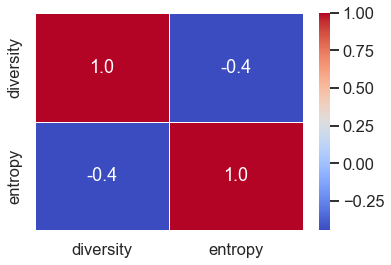

In [235]:
sns.heatmap(data=tot[["diversity", "entropy"]].corr(),annot=True, fmt=".1f",  linewidth=.5, cmap="coolwarm")
plt.show()